In [1]:
import os

from pathlib import Path
from functools import partial

import torch
from torchvision.transforms.v2 import Compose, ToImage, ToDtype, Resize
import matplotlib.pyplot as plt

from src.datasets.mvtec_ad import MVTecAD

In [2]:
def convert_to_binary_label(label: int) -> int:
    return 0 if label == 0 else 1

mvtec_dataset = partial(
    MVTecAD,
    dataset_dir=Path(os.environ["AD_DATASET_DIR"]),
    object=os.environ["AD_OBJECT"],
    sample_transform=Compose([ToImage(), Resize((256, 256)), ToDtype(dtype=torch.uint8, scale=False)]),
    target_transform=convert_to_binary_label,
)

ds_train = mvtec_dataset(training_set=True)
ds_test = mvtec_dataset(training_set=False, anomalies=["good"])

In [3]:
len(ds_test)

40

torch.Size([3, 256, 256])
0


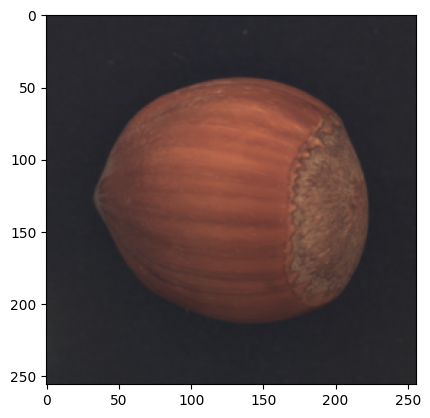

In [4]:
image, label = ds_test[20]
plt.imshow(image.movedim(0, -1))
print(image.shape)
print(label)